In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Define the function and its derivative
def f(x):
    return x**3 - 3*x  # Function with multiple minima

def df(x):
    return 3*x**2 - 3  # Derivative: f'(x) = 3x^2 - 3

In [51]:
# Gradient Descent Parameters
learning_rate = 0.005  # Reduce step size to avoid divergence
momentum = 0.8  # Reduce momentum strength

In [52]:
# Initialize x with a safer range to prevent overflow
x_no_momentum = np.random.uniform(-2, 2)  # Smaller starting range
x_momentum = x_no_momentum  # Ensure both start at the same place
velocity = 0  # Initialize velocity

In [53]:
# Clip x to prevent large values from the start
x_no_momentum = np.clip(x_no_momentum, -5, 5)
x_momentum = np.clip(x_momentum, -5, 5)

In [54]:
# Tolerance and max iterations to prevent infinite loops
tolerance = 1e-6
max_iterations = 1000

In [55]:
# Store values for visualization
x_values_no_momentum = [x_no_momentum]
y_values_no_momentum = [f(x_no_momentum)]
x_values_momentum = [x_momentum]
y_values_momentum = [f(x_momentum)]

In [56]:
# Perform Standard Gradient Descent (with safety checks)
iteration = 0
while abs(df(x_no_momentum)) > tolerance and iteration < max_iterations:
    gradient = df(x_no_momentum)
    x_no_momentum = x_no_momentum - learning_rate * gradient  # Update step
    x_no_momentum = np.clip(x_no_momentum, -5, 5)  # Prevent runaway values
    x_values_no_momentum.append(x_no_momentum)
    y_values_no_momentum.append(f(x_no_momentum))
    iteration += 1

In [57]:
# Perform Gradient Descent with Momentum (Safe Version)
iteration = 0
while abs(df(x_momentum)) > tolerance and iteration < max_iterations:
    gradient = df(x_momentum)
    velocity = momentum * velocity - learning_rate * gradient  # Update velocity
    x_momentum = x_momentum + velocity  # Update position with momentum
    x_momentum = np.clip(x_momentum, -5, 5)  # Prevent runaway values
    x_values_momentum.append(x_momentum)
    y_values_momentum.append(f(x_momentum))
    iteration += 1


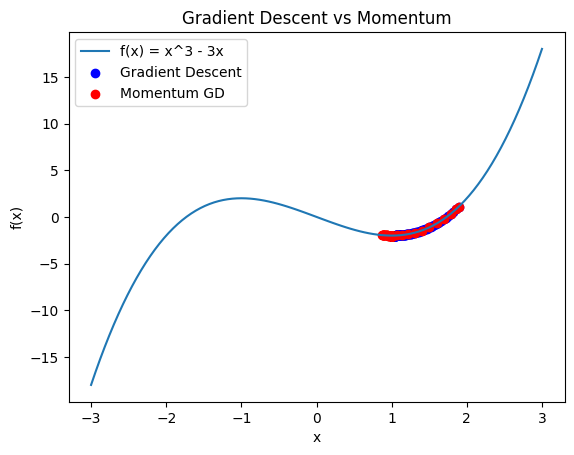

In [58]:
# Plot the function
x_range = np.linspace(-3, 3, 100)
y_range = f(x_range)
plt.plot(x_range, y_range, label='f(x) = x^3 - 3x')
plt.scatter(x_values_no_momentum, y_values_no_momentum, color='blue', label='Gradient Descent')
plt.scatter(x_values_momentum, y_values_momentum, color='red', label='Momentum GD')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Gradient Descent vs Momentum')
plt.show()